# Airline Passengers Dataset

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset_name = "airline_passengers"

In [3]:
input_fname = "AirPassengers.csv"
output_dir = f'./../../processed/{dataset_name}/'
outp_fname = os.path.join(output_dir, f'{dataset_name}.csv')
outp_fig_fname = os.path.join(output_dir, f'{dataset_name}.png')

# Read Data

In [4]:
data = pd.read_csv(input_fname)
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
series_col = "SeriesId"
epoch_col = 'Epoch'
time_col = 'Month'
value_col = '#Passengers'

# Insert Series Id Column

In [6]:
if series_col not in data:
    data.insert(0, "SeriesId", 1)
data.head()

,SeriesId,Month,#Passengers
0,1,1949-01,112
1,1,1949-02,118
2,1,1949-03,132
3,1,1949-04,129
4,1,1949-05,121


# Prepare Time Col

In [7]:
data['Month'] = data['Month'] + '-01'
data

,SeriesId,Month,#Passengers
0,1,1949-01-01,112
1,1,1949-02-01,118
2,1,1949-03-01,132
3,1,1949-04-01,129
4,1,1949-05-01,121
...,...,...,...
139,1,1960-08-01,606
140,1,1960-09-01,508
141,1,1960-10-01,461
142,1,1960-11-01,390


## Add Epochs

In [8]:
unique_times = sorted(data[time_col].drop_duplicates().tolist())
times_to_epoch = {
    t: i for i, t in enumerate(unique_times)
}
#print(yrmt_to_epoch)
data[epoch_col] = data[time_col].map(times_to_epoch)
data

,SeriesId,Month,#Passengers,Epoch
0,1,1949-01-01,112,0
1,1,1949-02-01,118,1
2,1,1949-03-01,132,2
3,1,1949-04-01,129,3
4,1,1949-05-01,121,4
...,...,...,...,...
139,1,1960-08-01,606,139
140,1,1960-09-01,508,140
141,1,1960-10-01,461,141
142,1,1960-11-01,390,142


## Reorder columns

In [9]:
data = data[[series_col, epoch_col, value_col]]
data.head()

,SeriesId,Epoch,#Passengers
0,1,0,112
1,1,1,118
2,1,2,132
3,1,3,129
4,1,4,121


# Visualize

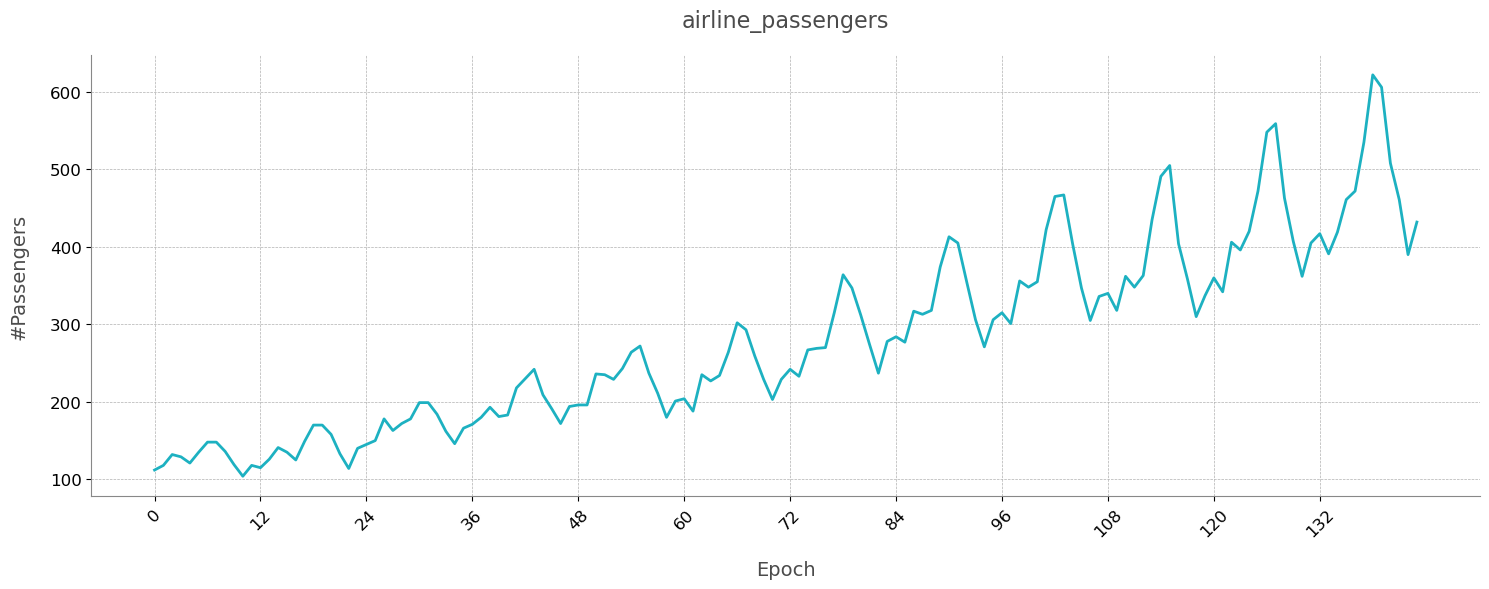

In [12]:
# Adjusting the spacing between axis titles and tick labels
plt.figure(figsize=(15, 6))

# Set title and labels with a medium contrast
font = {
#     'family': 'serif',
    'color':  '#4B4B4B',
    'weight': 'normal'
}

# Plotting the data
plt.plot(data[epoch_col], data[value_col], color='#1db1c1', linewidth=2)

# Adjusting the title and labels with increased spacing
plt.xlabel(epoch_col, fontsize=14, fontdict=font, labelpad=15)
plt.ylabel(value_col, fontsize=14, fontdict=font, labelpad=15)
plt.title(dataset_name, fontsize=16, fontdict=font, pad=20)

# Adjusting x and y ticks
plt.xticks(data[epoch_col][::12], rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Grid and spines adjustments
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='#B0B0B0')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('#888888')
ax.spines['bottom'].set_color('#888888')

plt.tight_layout()
plt.savefig(outp_fig_fname)
plt.show()

# Save Data

In [ ]:
data.to_csv(outp_fname, index=False)